## Importing packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

## Reading data

The 'census.csv' file contains all the data.

In [2]:
census_data = pd.read_csv('census.csv')
census_data.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


It can be observed that there are some entries with a '?' indicating missing values. This is handled in the data cleaning phase.

In [3]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null object
income            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Setting all object types to categorical type

In [4]:
for col in set(census_data.columns) - set(census_data.describe().columns):
    census_data[col] = census_data[col].astype('category')
    
print('Coumns and their data types')
print(census_data.info())

Coumns and their data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null category
fnlwgt            48842 non-null int64
education         48842 non-null category
education-num     48842 non-null int64
marital-status    48842 non-null category
occupation        48842 non-null category
relationship      48842 non-null category
race              48842 non-null category
sex               48842 non-null category
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null category
income            48842 non-null category
dtypes: category(9), int64(6)
memory usage: 2.7 MB
None


In [5]:
census_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Data cleaning

### Checking if there are any null columns

In [6]:
census_data.sum().isnull()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

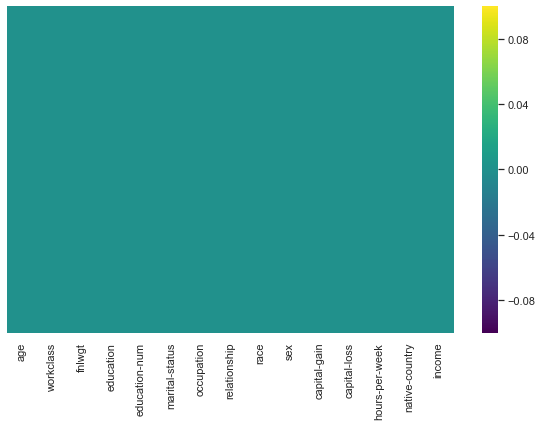

In [7]:
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(census_data.isnull(), yticklabels=False ,cmap="viridis")
plt.show()

It can be seen from the heatmap above that the number of null values in each column is zero. Hence, there are no null values in the dataset. 

### Checking if there are any missing values

In [18]:
print("Missing values present in the following attributes:")
print("---------------------------------------------------")
for x,y in zip(census_data.columns,(census_data.values.astype(str) == '?').sum(axis = 0)):
    if y > 0:
        print("{0} = {1} records".format(str(x), str(y)))

Missing values present in the following attributes:
---------------------------------------------------


### Using imputation methods to predict the missing values

The number of missing values in workclass and occupation columns seems almost equal. This means that whenever occupation is unknown, workclass is unknown too. These missing values can be filled by using all attributes as independent variables and performing multi class classification and then predicting the missing items.

In [9]:
def oneHotEncoding(dataframe, columns_dataframe):
    
    dataframe1 = dataframe.drop(columns = columns_dataframe, axis = 1)
    dataframe2 = pd.get_dummies(dataframe[columns_dataframe])
    
    return (pd.concat([dataframe1, dataframe2], axis=1, join='inner'))

#### Dropping the rows with missing values in 'native-country' column

To get a proper analysis, it is essential that the rows with missing values in 'native-country' to be dropped rather than replacing them. It is not reasonable to predict the missing values in the country column based on the data available. Also, 
by removing entries with missing values in 'native-country' column, we only lose 1.75% of the total data which is considerable for the problem at hand.

In [19]:
census_data = census_data[census_data['native-country'] != '?']

#### Filling missing values in 'occupation' column

In [11]:
test_data = census_data[(census_data.occupation.values == '?')].copy()
test_label = test_data.occupation

train_data = census_data[(census_data.occupation.values != '?')].copy()
train_label = train_data.occupation

test_data.drop(columns = ['occupation'], inplace = True)
train_data.drop(columns = ['occupation'], inplace = True)

train_data = oneHotEncoding(train_data, train_data.select_dtypes('category').columns)
test_data = oneHotEncoding(test_data, test_data.select_dtypes('category').columns)

log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)

r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data, train_label)
r_forest_pred = r_forest.predict(test_data)

majority_class = census_data.occupation.value_counts().index[0]

pred_df =  pd.DataFrame({'RFor': r_forest_pred, 'DTree' : clf_pred, 'LogReg' : log_reg_pred})
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis = 1)

census_data.loc[(census_data.occupation.values == '?'),'occupation'] = overall_pred.values
print(census_data.occupation.value_counts())
print(census_data.occupation.unique())

C:\Users\nitya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nitya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Craft-repair         7510
Prof-specialty       6379
Exec-managerial      6127
Adm-clerical         5947
Sales                5420
Other-service        5075
Machine-op-inspct    2971
Transport-moving     2341
Handlers-cleaners    2054
Farming-fishing      1502
Tech-support         1421
Protective-serv       990
Priv-house-serv       234
Armed-Forces           14
?                       0
Name: occupation, dtype: int64
[Machine-op-inspct, Farming-fishing, Protective-serv, Adm-clerical, Other-service, ..., Sales, Priv-house-serv, Transport-moving, Handlers-cleaners, Armed-Forces]
Length: 14
Categories (14, object): [Machine-op-inspct, Farming-fishing, Protective-serv, Adm-clerical, ..., Priv-house-serv, Transport-moving, Handlers-cleaners, Armed-Forces]


#### Filling missing values in 'workclass' column

In [12]:
test_data = census_data[(census_data.workclass.values == '?')].copy()
test_label = test_data.workclass

train_data = census_data[(census_data.workclass.values != '?')].copy()
train_label = train_data.workclass

test_data.drop(columns = ['workclass'], inplace = True)
train_data.drop(columns = ['workclass'], inplace = True)

train_data = oneHotEncoding(train_data, train_data.select_dtypes('category').columns)
test_data = oneHotEncoding(test_data, test_data.select_dtypes('category').columns)

log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)

r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data, train_label)
r_forest_pred = r_forest.predict(test_data)

majority_class = census_data.workclass.value_counts().index[0]

pred_df =  pd.DataFrame({'RFor': r_forest_pred, 'DTree' : clf_pred, 'LogReg' : log_reg_pred})
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis = 1)

census_data.loc[(census_data.workclass.values == '?'),'workclass'] = overall_pred.values
print(census_data.workclass.value_counts())
print(census_data.workclass.unique())

C:\Users\nitya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nitya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Private             35856
Self-emp-not-inc     3909
Local-gov            3140
State-gov            1974
Self-emp-inc         1660
Federal-gov          1409
Without-pay            21
Never-worked           16
?                       0
Name: workclass, dtype: int64
[Private, Local-gov, Self-emp-not-inc, Federal-gov, State-gov, Self-emp-inc, Without-pay, Never-worked]
Categories (8, object): [Private, Local-gov, Self-emp-not-inc, Federal-gov, State-gov, Self-emp-inc, Without-pay, Never-worked]


Now the data is free from null and missing values. Thus the data cleaning process has been performed successfully.

In [13]:
census_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Craft-repair,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


## Exploratory Data Analysis

### Finding out the relation between various attributes

Correlation Matrix
------------------


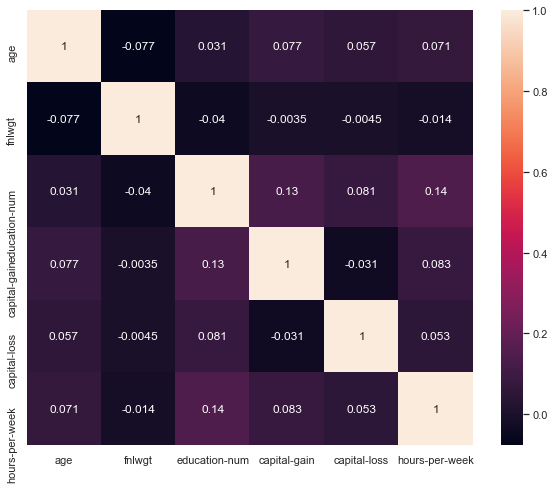

In [20]:
print("Correlation Matrix")
print("------------------")

results = census_data.corr()
plt.subplots(figsize=(10,8))
ax = sns.heatmap(results,annot = True)
bottom, top = ax.get_ylim()
ax = ax.set_ylim(bottom + 0.5, top - 0.5)


However, here is no considerably significant correlation among any of the attributes.

## Change labels for 'income' as 0 or 1

In [7]:
census_data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [8]:
census_data['income'] = census_data['income'].apply(lambda i: 1 if i=='>50K' else 0)

In [9]:
census_data['income'].unique()

array([0, 1], dtype=int64)

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64


Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Unknown              2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

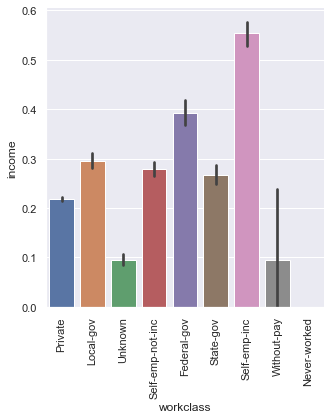

In [20]:
census_data.fillna('0', inplace=True)
census_data['workclass'].replace(to_replace="?",value = "Unknown", inplace = True)
sns.catplot(x="workclass", y="income", data=census_data, kind="bar")
print(census_data['income'])
plt.xticks(rotation=90);
census_data['workclass'].value_counts()

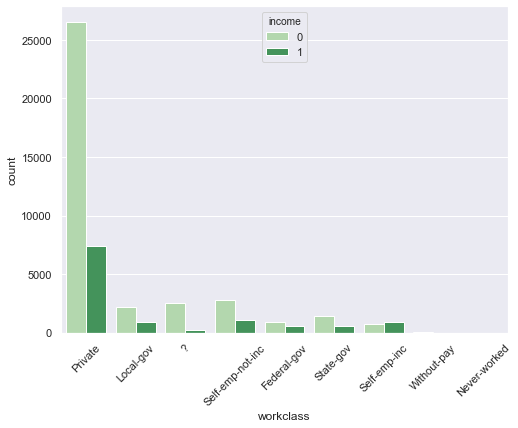

In [219]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(x='workclass', data=census_data, palette='Greens', hue='income')
plt.xticks(rotation=45)
plt.show()

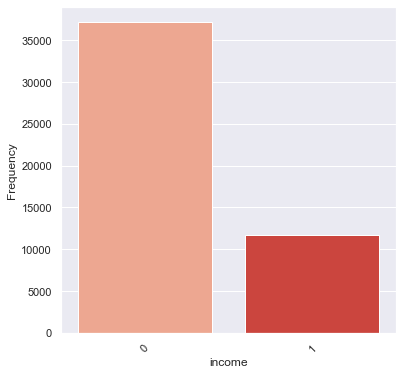

In [220]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(x='income', data=census_data, palette='Reds')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

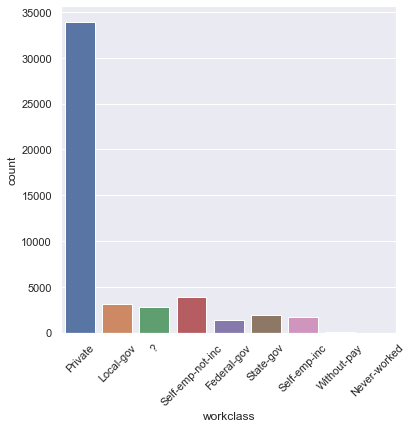

In [221]:
sns.countplot(x="workclass", data=census_data)
plt.xticks(rotation=45)
plt.show()

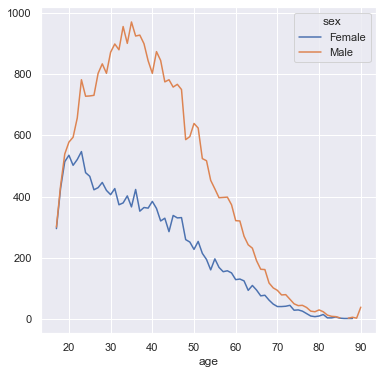

In [222]:
census_data.groupby(['age', 'sex'])['income'].count().unstack().plot(kind='line')

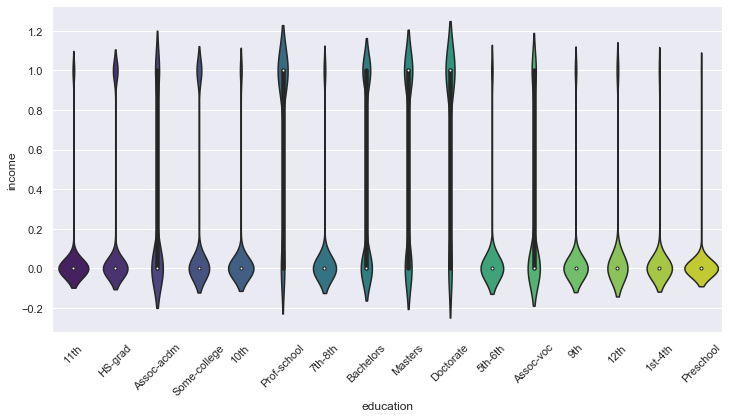

In [223]:
sns.set(rc={'figure.figsize':(12,6)})
sns.violinplot(x="education",y="income",data=census_data, palette = "viridis")
plt.xticks(rotation=45);

In [225]:
# sns.pairplot(census_data, hue='income')
# sns.jointplot(x='occupation', y='native-country', data=census_data, kind="kde");

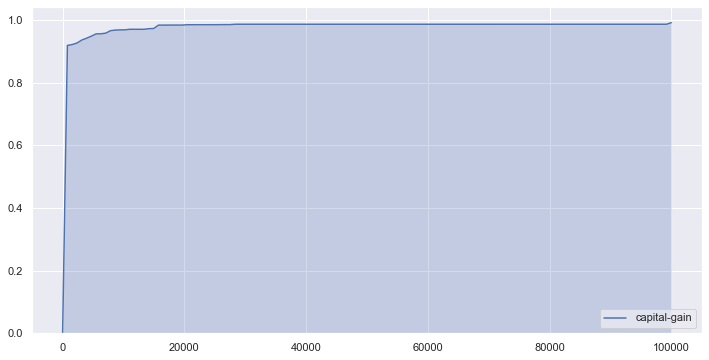

In [227]:
sns.kdeplot(census_data['capital-gain'], cumulative=True, bw=2, shade=True);

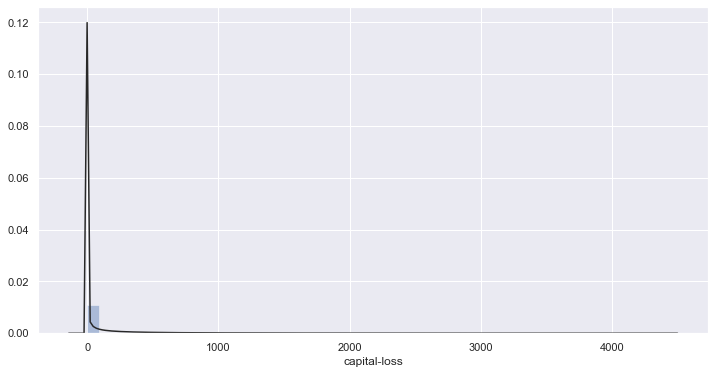

In [228]:
sns.distplot(census_data['capital-loss'], kde=False, fit=stats.gamma);

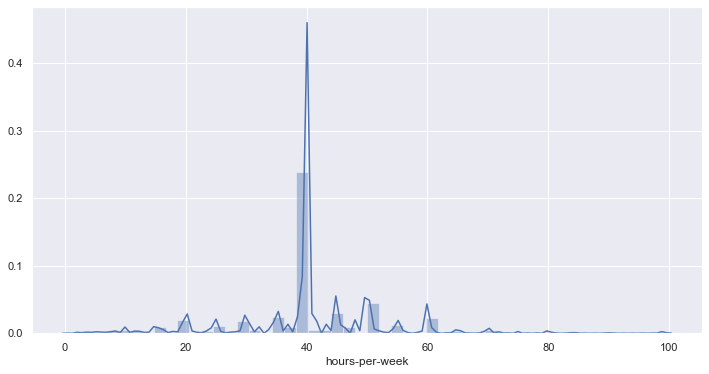

In [229]:
# census_data.groupby(['age', 'hours-per-week'])['income'].count().plot(kind='barh', figsize = (6,6))
sns.distplot(census_data['hours-per-week']);

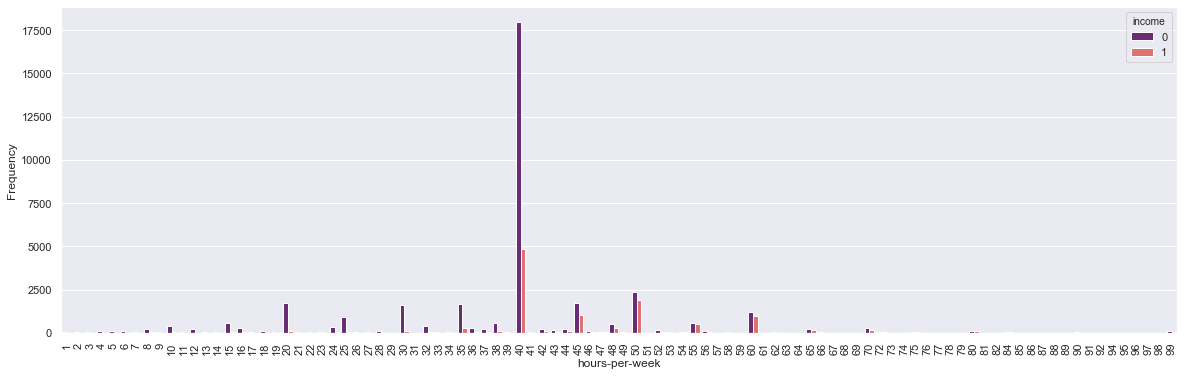

In [230]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x='hours-per-week', data=census_data, hue='income',palette='magma')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

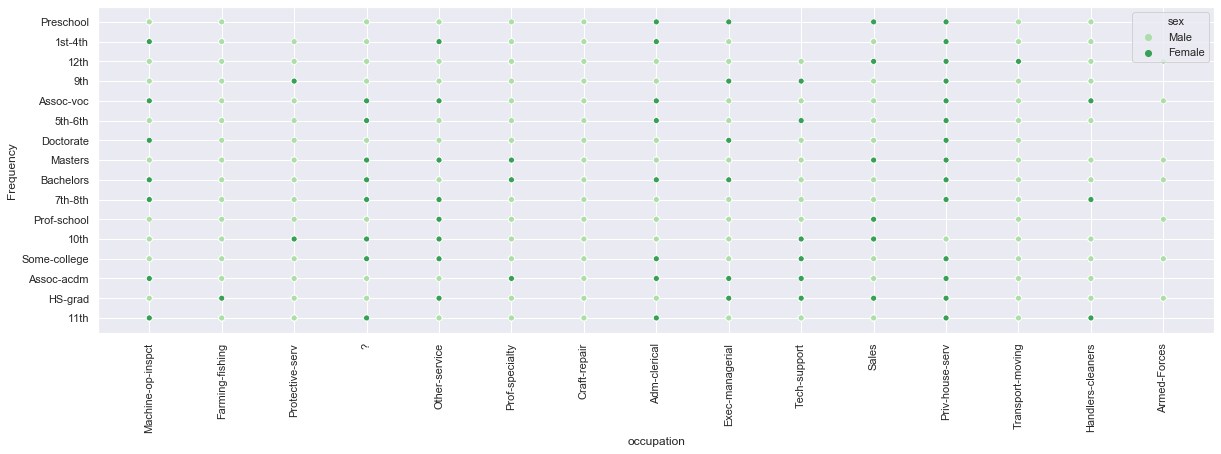

In [231]:
sns.set(rc={'figure.figsize':(20,6)})
sns.scatterplot(x='occupation', y='education', data=census_data, hue='sex',palette='Greens')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

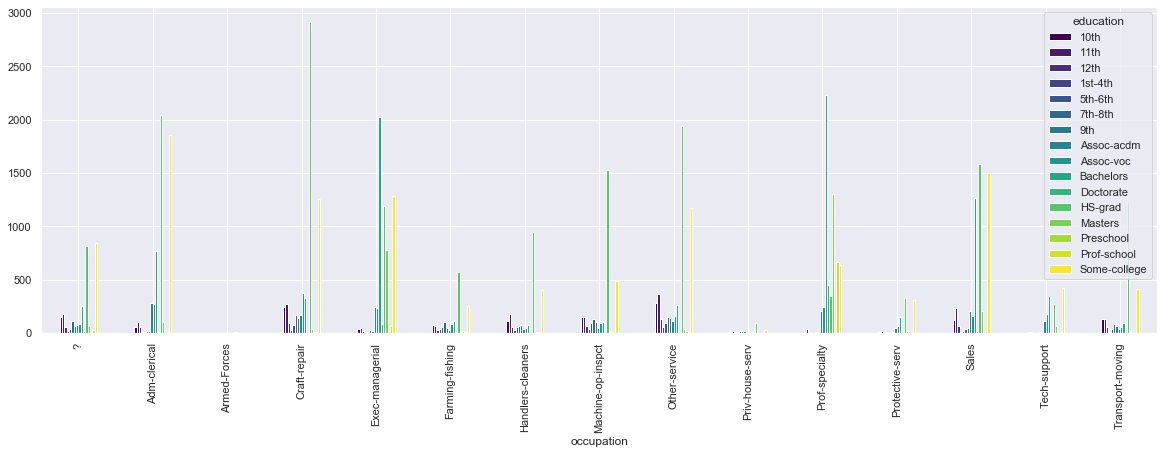

In [232]:
census_data.groupby(['occupation', 'education'])['income'].count().unstack().plot(kind='bar', colormap='viridis')
plt.show()

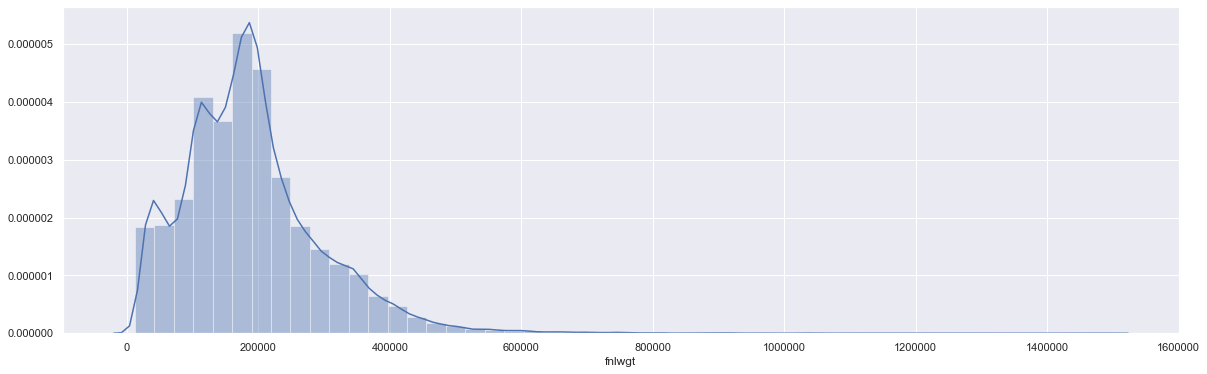

In [233]:
sns.distplot(census_data['fnlwgt'])
plt.show()

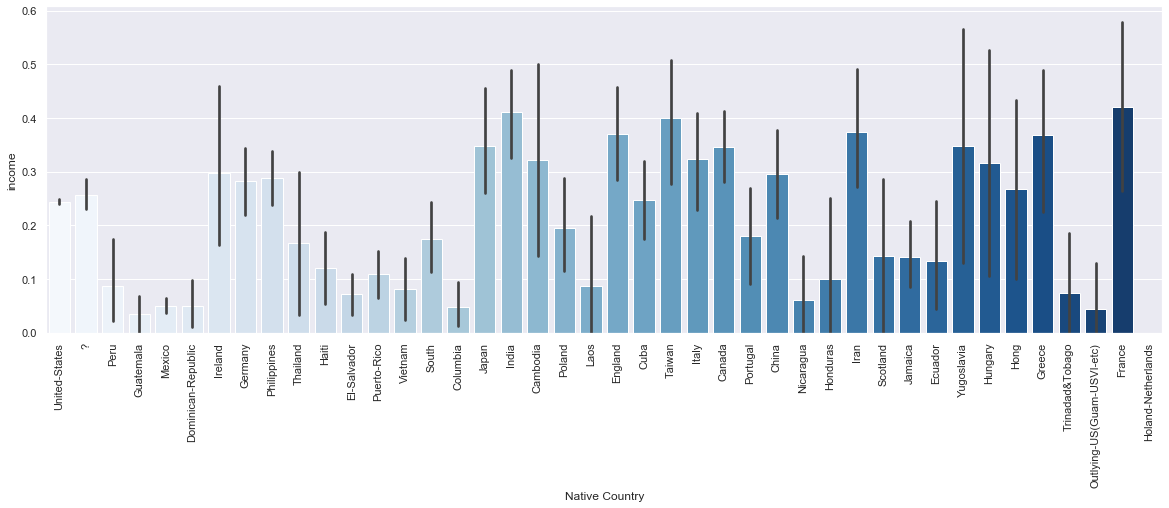

In [234]:
sns.set(rc={'figure.figsize':(20,6)})
sns.barplot(x='native-country', y='income', data=census_data, palette = 'Blues')
plt.xlabel('Native Country')
plt.xticks(rotation=90);

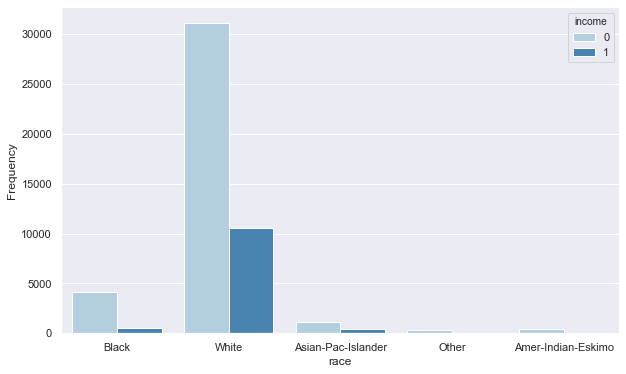

In [235]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(x='race', data=census_data, hue='income', palette='Blues')
plt.ylabel('Frequency')
# plt.xticks(rotation=90)
plt.show()

## Converting categorical variables into indicator variables

In [236]:
workclass = pd.get_dummies(census_data["workclass"],drop_first=True)
workclass.head(2)

,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0


In [237]:
maritalstatus = pd.get_dummies(census_data["marital-status"],drop_first=True)
maritalstatus.head(2)

,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0,0,0,1,0,0
1,0,1,0,0,0,0


In [238]:
education = pd.get_dummies(census_data["education"],drop_first=True)
education.head(2)

,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [239]:
occupation = pd.get_dummies(census_data["occupation"],drop_first=True)
occupation.head(2)

,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [240]:
relation = pd.get_dummies(census_data["relationship"],drop_first=True)
relation.head(2)

,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,0,0,1,0,0
1,0,0,0,0,0


In [241]:
sex = pd.get_dummies(census_data["sex"],drop_first=True)
sex.head(2)

,Male
0,1
1,1


In [242]:
census_data = pd.concat([census_data, workclass, maritalstatus, education, occupation, relation, sex], axis=1)
census_data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,Protective-serv,Sales,Tech-support,Transport-moving,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Male
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,0,0,0,0,0,0,1,0,0,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,0,0,0,0,0,0,0,0,0,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,1,0,0,0,0,0,0,0,0,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,0,0,0,0,0,0,0,0,0,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,...,0,0,0,0,0,0,1,0,0,0


In [243]:
census_data.drop(['workclass','education','marital-status','occupation','relationship','race','sex'],axis=1,inplace=True)

In [244]:
census_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,native-country,income,Federal-gov,Local-gov,...,Protective-serv,Sales,Tech-support,Transport-moving,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Male
0,25,226802,7,0,0,40,United-States,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,38,89814,9,0,0,50,United-States,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28,336951,12,0,0,40,United-States,1,0,1,...,1,0,0,0,0,0,0,0,0,1
3,44,160323,10,7688,0,40,United-States,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,18,103497,10,0,0,30,United-States,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [245]:
census_data.drop(['native-country'],axis=1,inplace=True)
census_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,Federal-gov,Local-gov,Never-worked,...,Protective-serv,Sales,Tech-support,Transport-moving,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Male
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28,336951,12,0,0,40,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,44,160323,10,7688,0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,18,103497,10,0,0,30,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [246]:
X = census_data.drop('income',axis=1)
y = census_data['income']

In [247]:
from sklearn.model_selection import train_test_split, cross_val_score

In [248]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=43)

In [249]:
X_train.shape

(39073, 55)

In [250]:
y_train.shape

(39073,)

In [251]:
X_test.shape

(9769, 55)

In [252]:
y_test.shape

(9769,)

In [253]:
from sklearn.linear_model import LogisticRegression

In [254]:
lg = LogisticRegression()

In [255]:
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [256]:
from sklearn.metrics import accuracy_score

In [257]:
lg_train = lg.predict(X_train)
print('Training Accuracy: ', accuracy_score(y_train, lg_train))

Training Accuracy:  0.7989916310495738


In [258]:
from sklearn.metrics import confusion_matrix

In [259]:
lg_pred = lg.predict(X_test)

In [260]:
confusion_matrix(lg_pred, y_test)

array([[7145, 1788],
       [ 225,  611]])

In [261]:
from sklearn.tree import DecisionTreeClassifier

In [262]:
dt = DecisionTreeClassifier()

In [263]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [264]:
dt_train = dt.predict(X_train)
print('Training Accuracy: ', accuracy_score(y_train, dt_train))

Training Accuracy:  0.9999232206382924


In [265]:
dt_pred = dt.predict(X_test)
print('Test Accuracy: ', accuracy_score(y_test, dt_pred))

Test Accuracy:  0.8096018016173611


In [266]:
# CV
scores = cross_val_score(dt, X_train, y_train, cv=7)
print(scores)
print('Test Accuracy with cv: ', scores.mean())

[0.81744894 0.8135077  0.81422429 0.81852383 0.81924042 0.81404515
 0.81884967]
Test Accuracy with cv:  0.8165485706523141


In [267]:
from sklearn.metrics import classification_report

In [268]:
print(confusion_matrix(y_test,dt_pred))
print(classification_report(y_test,dt_pred))

[[6444  926]
 [ 934 1465]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7370
           1       0.61      0.61      0.61      2399

    accuracy                           0.81      9769
   macro avg       0.74      0.74      0.74      9769
weighted avg       0.81      0.81      0.81      9769



In [269]:
from sklearn.ensemble import RandomForestClassifier

In [270]:
rfc = RandomForestClassifier(n_estimators=70, criterion='entropy', random_state=33, n_jobs=-1, max_features=50)

In [271]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=50,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=33, verbose=0,
                       warm_start=False)

In [272]:
rfc_train = rfc.predict(X_train)
print('Training Accuracy: ', accuracy_score(y_train, rfc_train))

Training Accuracy:  0.9997440687943081


In [273]:
rfc_pred = rfc.predict(X_test)
print('Test Accuracy: ', accuracy_score(y_test, rfc_pred))

Test Accuracy:  0.8545398710205753


In [274]:
# CV
scores = cross_val_score(rfc, X_train, y_train, cv=10)
print(scores)
print('Test Accuracy with cv: ', scores.mean())

[0.8513306  0.86438076 0.85158649 0.86306629 0.8495009  0.86229844
 0.85180445 0.86076273 0.85743537 0.85717942]
Test Accuracy with cv:  0.856934545742243


In [275]:
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[6870  500]
 [ 921 1478]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7370
           1       0.75      0.62      0.68      2399

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769



In [276]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

In [277]:
knn = KNeighborsClassifier()

In [278]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [279]:
knn_train = knn.predict(X_train)
print('Training Accuracy: ', accuracy_score(y_train, knn_train))

Training Accuracy:  0.8380979192792978


In [280]:
knn_pred = knn.predict(X_test)
print('Test Accuracy: ', accuracy_score(y_test, knn_pred))

Test Accuracy:  0.7742860067560651


In [281]:
print('Confusion Matrix: ', confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

Confusion Matrix:  [[6758  612]
 [1593  806]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      7370
           1       0.57      0.34      0.42      2399

    accuracy                           0.77      9769
   macro avg       0.69      0.63      0.64      9769
weighted avg       0.75      0.77      0.75      9769



In [282]:
scores = cross_val_score(knn, X_train, y_train, cv=10)
print(scores)
print('Test Accuracy: ', scores.mean())

[0.76970317 0.76867963 0.77558854 0.78397748 0.77732275 0.77476325
 0.78090607 0.77066803 0.78372153 0.77783466]
Test Accuracy:  0.7763165095638384


In [283]:
from xgboost import XGBClassifier

In [284]:
xgb = XGBClassifier()

In [285]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [286]:
# Training accuracy
xgb_train = xgb.predict(X_train)
print('Training Accuracy: ', accuracy_score(y_train, xgb_train))

Training Accuracy:  0.8685281396360658


In [287]:
xgb_pred = xgb.predict(X_test)

In [288]:
print('Testing Accuracy: ', accuracy_score(y_test, xgb_pred))

Testing Accuracy:  0.8624219469751254


In [289]:
# CV
scores = cross_val_score(xgb, X_train, y_train, cv=5)
print(scores)
print(scores.mean())

[0.86577095 0.86845809 0.86705054 0.86434605 0.86639365]
0.8664038577018036


In [290]:
from sklearn.ensemble import GradientBoostingClassifier

In [291]:
gbc = GradientBoostingClassifier()

In [292]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [293]:
gbc_train = gbc.predict(X_train)
print('Training Accuracy: ', accuracy_score(y_train, gbc_train))

Training Accuracy:  0.870012540629079


In [294]:
gbc_pred = gbc.predict(X_test)

In [295]:
print('Testing Accuracy: ', accuracy_score(y_test, gbc_pred))

Testing Accuracy:  0.8660047087726481


In [296]:
# CV
scores = cross_val_score(gbc, X_train, y_train, cv=5)
print(scores)
print('Testing Accuracy with CV: ', scores.mean())

[0.86410749 0.86845809 0.87127319 0.86600973 0.8666496 ]
Testing Accuracy with CV:  0.8672996202003688


In [297]:
from sklearn.svm import SVC

In [298]:
svc = SVC(C = 10)

In [299]:
svc.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [300]:
svc_train = svc.predict(X_train)
print('Training Accuracy: ', accuracy_score(y_train, svc_train))

Training Accuracy:  0.7992219691346966


In [301]:
svc_pred = svc.predict(X_test)

In [302]:
print('Testing Accuracy: ', accuracy_score(y_test, svc_pred))

Testing Accuracy:  0.795577848295629


In [303]:
# CV
scores = cross_val_score(svc, X_train, y_train, cv=5)
print(scores)
print('Testing Accuracy with CV: ', scores.mean())

[0.79424184 0.80025592 0.79680102 0.80176606 0.80419759]
Testing Accuracy with CV:  0.7994524878734479
